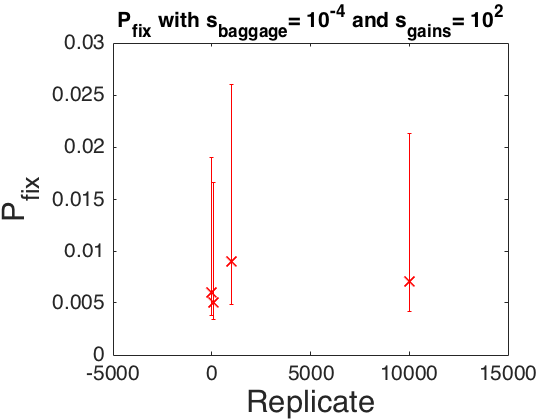

In [1]:
for y=1:2
    for i=1:4
        
        %General Parameters
                N = 100; %population size 
                num_loci = 1000;%number of loci in accessory genome
                m = [10, 100, 1000, 10000]; %m = [1, 10,50, 100, 1000, 10000];
                mu_1 =  10^(-7);%mutation rate
                mu_2 = 100*mu_1;
                rev_mut = .001;
                num_essential = round(.25*num_loci);

            %scalar values of some things
                s_baggage = 10^(-i);%costs
                s_gains = 10^(y); 
                frac_needed_scalar = .1; %fraction_needed 
            %vector values of the same things things
                % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
                %             %of each functional locus when needed
                % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
                % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed


            %simulation parameters
                num_reps = 1000; %number of replicate runs
            %initialize data structures
                is_fixed = zeros(length(m), num_reps);
                stop_time = zeros(length(m), num_reps);
                m_array_index = 0;





        %for the figure
            close all;
            fontSize = 15;




        for l = m

            change_rate = l;%number of gens btwn environmental changes
            m_array_index = m_array_index+1;
            for j = 1:num_reps
                pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar;
                k=1;
                counter = round((rand)*(change_rate - 1));
                while k == 1

                    counter = counter + 1;

                    if mod(counter,change_rate)==0 %determines if environment should change this generation
                        rand_vect = rand(1,num_loci); %initializes with a random environment
                        env = rand_vect<=frac_needed_scalar; %resets each environment
                    end

                    pop = mutate3(pop, rev_mut, num_essential); %mutate population
                    %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
                    if (size(pop,1) == 1) && (isnan(pop(:,2)))
                        break
                    end
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
                    pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation

                    index = find(m == change_rate);

                    mu_poly = unique(pop(:, end));
                    if length(mu_poly) == 1
                        k = 0;
                        if mu_poly == mu_1
                            is_fixed(index,j) = 0;
                            stop_time(index,j)= counter;
                        elseif mu_poly == mu_2
                            is_fixed(index,j) = 1;
                            stop_time(index,j)= counter;

                        else
                             error('Value other than 0 or 1 are not permited')
                        end
                    end



                end


            end

        end

        pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
        pfix_cr100 = sum(is_fixed(2,:),2)/num_reps;
        pfix_cr1000 = sum(is_fixed(3,:),2)/num_reps;
        pfix_cr10000 = sum(is_fixed(4,:),2)/num_reps;
        r =[pfix_cr10; pfix_cr100; pfix_cr1000; pfix_cr10000];
        r_prime = r*num_reps;
        [phat,pci] =binofit(r_prime,num_reps, 0.05);
        figure;
        fig = errorbar(m,phat,pci(:,1), pci(:,2),'rx');
        a = [ 'P_{fix} with s_{baggage}= 10^{-' , num2str(i), '} and s_{gains}= 10^{',num2str(y),'}'];
        title(a, 'FontSize', 10);
        xlabel('Replicate', 'FontSize', fontSize);
        ylabel('P_{fix}', 'FontSize', fontSize);
        
        filename = [ 's_baggage 10^-', num2str(i), ' and s_gains 10^',num2str(y), ' and N ',num2str(N),'' ];
        save(filename);
        
        
    end

end

In [ ]:
load()